In [2]:
# Perintah berikut digunakan untuk menginstal beberapa pustaka Python yang umum digunakan dalam analisis data,
# pembelajaran mesin (machine learning), dan pengolahan bahasa alami (NLP):
!pip install numpy pandas nltk seaborn matplotlib scikit-learn xgboost


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Mengimpor library numpy untuk komputasi numerik, terutama untuk operasi array
import numpy as np 

# Mengimpor library pandas untuk manipulasi dan analisis data, khususnya untuk struktur data DataFrame
import pandas as pd

# Mengimpor modul re untuk melakukan pencocokan pola dengan regular expressions pada teks
import re

# Mengimpor library NLTK (Natural Language Toolkit) untuk pemrosesan bahasa alami (NLP)
import nltk

# import demoji
# Baris ini dikomentari. Jika diperlukan, demoji dapat digunakan untuk menghapus atau mengkonversi emoji dalam teks

# Mengimpor modul string yang menyediakan fungsi dan konstanta terkait pengolahan string
import string

# Mengimpor library seaborn untuk visualisasi data statistik yang lebih menarik dan informatif
import seaborn as sns

# Mengimpor modul pyplot dari matplotlib untuk membuat grafik dan visualisasi data secara umum
import matplotlib.pyplot as plt

# Mengimpor DecisionTreeClassifier dari scikit-learn untuk membuat model klasifikasi menggunakan pohon keputusan
from sklearn.tree import DecisionTreeClassifier

# Mengimpor RandomForestClassifier dari scikit-learn untuk membuat model ensemble learning dengan metode Random Forest
from sklearn.ensemble import RandomForestClassifier

# Mengimpor stopwords dari NLTK untuk mengakses daftar kata umum yang sering diabaikan dalam analisis teks
from nltk.corpus import stopwords

# Mengimpor PorterStemmer dari NLTK untuk melakukan stemming, yaitu mengubah kata ke bentuk dasarnya
from nltk.stem.porter import PorterStemmer

# Mengimpor CountVectorizer untuk mengubah koleksi dokumen teks menjadi matriks token (fitur hitung kata)
from sklearn.feature_extraction.text import CountVectorizer

# Mengimpor LabelEncoder dari scikit-learn untuk mengubah label kategorikal menjadi format numerik
from sklearn.preprocessing import LabelEncoder

# Mengimpor fungsi word_tokenize dari NLTK untuk memecah teks menjadi token (kata-kata)
from nltk.tokenize import word_tokenize

# Mengimpor fungsi train_test_split dari scikit-learn untuk membagi dataset menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Mengimpor TfidfVectorizer untuk mengubah teks menjadi fitur berdasarkan perhitungan TF-IDF
# (Term Frequency-Inverse Document Frequency)
from sklearn.feature_extraction.text import TfidfVectorizer

# Mengimpor XGBClassifier dari xgboost untuk membangun model klasifikasi dengan algoritma gradient boosting yang efisien
from xgboost import XGBClassifier

# Mengimpor berbagai metrik evaluasi dari scikit-learn untuk mengukur kinerja model klasifikasi
from sklearn.metrics import (accuracy_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, 
                             classification_report, roc_curve, auc)

# Impor ulang confusion_matrix (perlu diperhatikan bahwa baris ini mungkin duplikat dan dapat dihapus)
from sklearn.metrics import confusion_matrix


In [4]:
# demoji.download_codes()
# Baris ini seharusnya digunakan untuk mengunduh kode emoji menggunakan library demoji.
# Namun, karena baris ini dikomentari, maka tidak akan dieksekusi.

# Mengunduh daftar stopwords dari NLTK.
# Stopwords merupakan kata-kata umum (seperti "dan", "atau", "itu") yang biasanya diabaikan dalam pemrosesan teks.
nltk.download('stopwords')

# Mengunduh paket 'punkt' dari NLTK.
# Paket ini digunakan untuk tokenisasi, yaitu memecah teks menjadi kalimat atau kata.
nltk.download('punkt')

# Mengunduh paket 'punkt_tab' dari NLTK.
# Paket ini merupakan varian dari 'punkt' yang mungkin disesuaikan untuk mengatasi tokenisasi teks dengan format khusus (misalnya teks yang mengandung tab).
nltk.download('punkt_tab')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KillerKing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KillerKing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\KillerKing\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [5]:
# Membaca file CSV "Suicide_Ideation_Dataset.csv" dari direktori saat ini 
# dan menyimpannya ke dalam variabel 'df' sebagai sebuah DataFrame menggunakan fungsi read_csv dari library pandas.
df = pd.read_csv("./Suicide_Ideation_Dataset.csv")

In [6]:
# Menghapus semua baris dalam DataFrame 'df' yang mengandung nilai kosong (missing values)
# dan menyimpan kembali DataFrame yang sudah dibersihkan ke variabel 'df'
df = df.dropna()

In [7]:
# Mengonversi kolom 'Tweet' menjadi tipe data string
df['Tweet'] = df['Tweet'].astype(str)

# Mengonversi kolom 'Suicide' menjadi tipe data string
df['Suicide'] = df['Suicide'].astype(str)

# Mengubah semua karakter pada kolom 'Tweet' menjadi huruf kecil untuk standarisasi teks
df['Tweet'] = df['Tweet'].str.lower()

# Mengubah semua karakter pada kolom 'Suicide' menjadi huruf kecil untuk konsistensi data
df['Suicide'] = df['Suicide'].str.lower()

In [8]:
# Memproses setiap baris pada kolom 'Tweet' dengan cara:
# 1. Memecah string teks menjadi daftar kata menggunakan split()
# 2. Menggunakan list comprehension untuk memilih hanya kata-kata yang TIDAK diawali dengan '@'
#    (biasanya untuk menghapus mention atau tag pengguna pada tweet)
# 3. Menggabungkan kembali kata-kata yang telah dipilih menjadi sebuah string tunggal menggunakan join()
df['Tweet'] = df['Tweet'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('@')]))

In [9]:
# Membuat filter untuk memilih baris di mana kolom 'Tweet' TIDAK mengandung substring '&quot;'
filtre = ~df['Tweet'].str.contains('&quot;')

# Mengaplikasikan filter tersebut untuk memilih baris yang memenuhi kondisi filter pada DataFrame
df = df[filtre]

# Menampilkan 5 baris pertama dari DataFrame yang telah difilter
df.head()

,Tweet,Suicide
0,making some lunch,not suicide post
1,you want his money.,not suicide post
2,that crap took me forever to put together. iâ...,potential suicide post
3,#kiwitweets hey jer! since when did you start ...,not suicide post
5,"oh, that's good to hear. but is it over alread...",not suicide post


In [10]:
# Definisikan fungsi 'Temizle' untuk membersihkan teks dari karakter yang tidak diinginkan
def Temizle(text):
    # Mengganti semua karakter yang bukan huruf (a-z atau A-Z) dengan spasi
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Menghapus semua angka dari teks
    text = re.sub(r'\d+', '', text)
    
    # Mengurangi pengulangan karakter yang sama secara berlebihan (contoh: "sooooo" menjadi "so")
    text = re.sub(r'(.)\1+', r'\1', text)
    
    # Menghapus URL yang diawali dengan "http" atau "https"
    text = re.sub(r'http[s]?://\S+', '', text)
    
    # Menghapus URL yang diawali dengan "www."
    text = re.sub(r'www\.\S+', '', text)
    
    # Baris berikut dikomentari; bisa digunakan untuk menghapus kata-kata tertentu seperti 'rt', 'twitter', dan 'tweet'
    # text = re.sub(r'\brt\b', '', text) 
    # text = re.sub(r'\btwitter\b', '', text)
    # text = re.sub(r'\btweet\b', '', text)
    
    # Mengembalikan teks yang telah dibersihkan
    return text

# Terapkan fungsi 'Temizle' pada setiap entri di kolom 'Tweet' dari DataFrame untuk membersihkan teks tweet
df['Tweet'] = df['Tweet'].apply(Temizle)

# Tampilkan 5 baris pertama DataFrame yang telah dibersihkan
df.head()

,Tweet,Suicide
0,making some lunch,not suicide post
1,you want his money,not suicide post
2,that crap tok me forever to put together i m g...,potential suicide post
3,kiwitwets hey jer since when did you start tw...,not suicide post
5,oh that s god to hear but is it over already o...,not suicide post


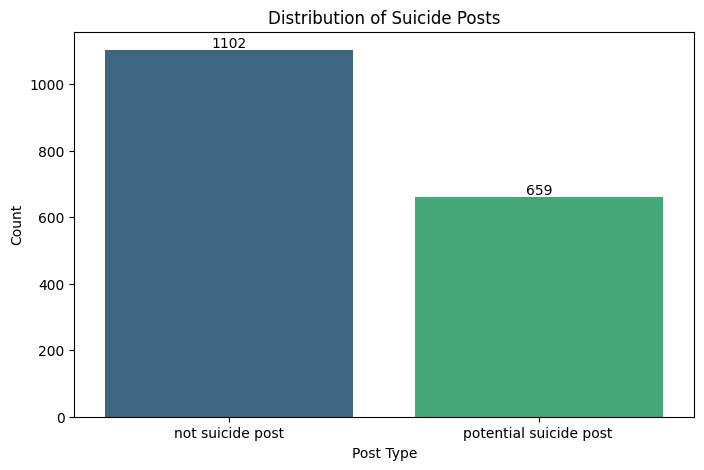

In [11]:
# Mengimpor modul pyplot dari matplotlib untuk membuat visualisasi data
import matplotlib.pyplot as plt
# Mengimpor library seaborn untuk visualisasi statistik yang lebih menarik
import seaborn as sns

# Menghitung jumlah masing-masing kategori pada kolom 'Suicide' dan menyimpannya dalam variabel 'suicide_counts'
suicide_counts = df['Suicide'].value_counts()

# Membuat figure baru dengan ukuran 8x5 inci
plt.figure(figsize=(8, 5))

# Membuat bar plot menggunakan seaborn:
# - x: kategori dari 'Suicide' (indeks dari suicide_counts)
# - y: jumlah masing-masing kategori (nilai dari suicide_counts)
# - palette: menggunakan skema warna 'viridis'
# - hue: menggunakan kategori sebagai parameter pewarnaan untuk tiap bar
# - legend: disembunyikan
sns.barplot(x=suicide_counts.index, y=suicide_counts.values, palette='viridis', hue=suicide_counts.index, legend=False)

# Menambahkan judul pada plot
plt.title('Distribution of Suicide Posts')
# Menambahkan label pada sumbu x
plt.xlabel('Post Type')
# Menambahkan label pada sumbu y
plt.ylabel('Count')

# Menambahkan teks yang menampilkan jumlah pada setiap bar di atas bar tersebut
for i in range(len(suicide_counts)):
    # Menempatkan teks di posisi tengah bar dengan sedikit offset vertikal (0.5) agar tidak menimpa bar
    plt.text(i, suicide_counts.iloc[i] + 0.5, f'{suicide_counts.iloc[i]}', ha='center', va='bottom')

# Menampilkan plot
plt.show()

In [12]:
# Membuat kolom baru 'Output' dalam DataFrame 'df' berdasarkan nilai pada kolom 'Suicide'
# Jika nilai pada kolom 'Suicide' diawali dengan huruf 'p', maka akan diberikan nilai 1, jika tidak akan diberikan nilai 0.
df['Output'] = df['Suicide'].apply(lambda x: 1 if x.startswith('p') else 0)

In [13]:
# Membuat objek TfidfVectorizer dengan parameter max_features=1000
# Parameter ini membatasi jumlah fitur (kata) yang akan diambil, sehingga hanya 1000 kata teratas yang dianggap
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Contoh: menggunakan max_features=1000

# Mengubah teks pada kolom 'Tweet' menjadi representasi matriks fitur menggunakan nilai TF-IDF
# Fungsi fit_transform() melakukan fitting pada data (menyesuaikan vectorizer dengan data) dan langsung mentransformasi data menjadi matriks fitur
X = tfidf_vectorizer.fit_transform(df['Tweet'])

In [14]:
# Tampilkan 5 baris pertama DataFrame yang sudah dimodifikasi
df.head()

,Tweet,Suicide,Output
0,making some lunch,not suicide post,0
1,you want his money,not suicide post,0
2,that crap tok me forever to put together i m g...,potential suicide post,1
3,kiwitwets hey jer since when did you start tw...,not suicide post,0
5,oh that s god to hear but is it over already o...,not suicide post,0


In [15]:
# Fungsi untuk melakukan preprocessing teks menggunakan teknik NLP
def nlprocess(text):
    # Mengubah teks menjadi huruf kecil dan memecahnya menjadi token (kata-kata) menggunakan word_tokenize
    text = word_tokenize(text.lower())
    
    # Mendapatkan kumpulan stopwords dalam bahasa Inggris dari NLTK
    stop_words = set(stopwords.words('english'))
    
    # Membuat objek PorterStemmer untuk melakukan stemming (mengubah kata ke bentuk dasarnya)
    stemmer = PorterStemmer()
    
    # Melakukan proses stemming untuk setiap kata yang bukan merupakan stopword
    # List comprehension digunakan untuk memproses token dan menyaring kata-kata yang tidak diinginkan
    text = [stemmer.stem(word) for word in text if word not in stop_words]
    
    # Menggabungkan token yang telah diproses menjadi sebuah string dengan spasi sebagai pemisah
    return ' '.join(text)

# Menerapkan fungsi nlprocess ke setiap entri di kolom 'Tweet' untuk melakukan preprocessing teks
df['Tweet'] = df['Tweet'].apply(nlprocess)

In [16]:
# Mengimpor CountVectorizer untuk mengubah teks menjadi representasi numerik (bag-of-words)
from sklearn.feature_extraction.text import CountVectorizer

# Mengimpor fungsi train_test_split untuk membagi dataset menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split

# Inisialisasi CountVectorizer untuk mengonversi teks pada kolom 'Tweet' menjadi matriks fitur
vectorizer = CountVectorizer()  # Inisialisasi vectorizer

# Terapkan vectorizer ke kolom 'Tweet' dari DataFrame, 
# lalu ubah hasilnya ke array numerik yang merepresentasikan frekuensi kata
X = vectorizer.fit_transform(df['Tweet']).toarray()

# Membagi data menjadi fitur (X) dan label (y) dengan perbandingan 80% data pelatihan dan 20% data pengujian.
# random_state=52 digunakan agar pembagian data konsisten setiap kali kode dijalankan.
X_train, X_test, y_train, y_test = train_test_split(X, df['Output'], test_size=0.2, random_state=52)

In [17]:
# Mengimpor metrik evaluasi untuk mengukur performa model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Mengimpor RandomForestClassifier untuk melakukan klasifikasi menggunakan metode Random Forest
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest dengan 100 pohon (n_estimators=100)
# random_state=52 memastikan hasil yang konsisten setiap kali kode dijalankan
rf_n_model = RandomForestClassifier(n_estimators=100, random_state=52)

# Melatih model menggunakan data pelatihan (fit ke X_train dan y_train)
rf_n_model.fit(X_train, y_train)

# Melakukan prediksi pada data test (X_test)
y_pred = rf_n_model.predict(X_test)

# Evaluasi model:
# Menghitung akurasi dengan membandingkan hasil prediksi (y_pred) dengan label sebenarnya (y_test)
rf_n_accuracy = accuracy_score(y_test, y_pred)
# Menghitung precision (presisi) dengan rata-rata berbobot untuk menangani kasus multiclass
rf_n_precision = precision_score(y_test, y_pred, average="weighted")
# Menghitung recall (sensitivitas) dengan rata-rata berbobot
rf_n_recall = recall_score(y_test, y_pred, average="weighted")
# Menghitung F1-score, yaitu rata-rata harmonis antara precision dan recall
rf_n_f1 = f1_score(y_test, y_pred, average="weighted")

# Menampilkan hasil evaluasi model
print("rf_n Accuracy:", rf_n_accuracy)
print("rf_n Precision:", rf_n_precision)
print("rf_n Recall:", rf_n_recall)
print("rf_n F1-Score:", rf_n_f1)

rf_n Accuracy: 0.9660056657223796
rf_n Precision: 0.9660218119816546
rf_n Recall: 0.9660056657223796
rf_n F1-Score: 0.9658770904743165


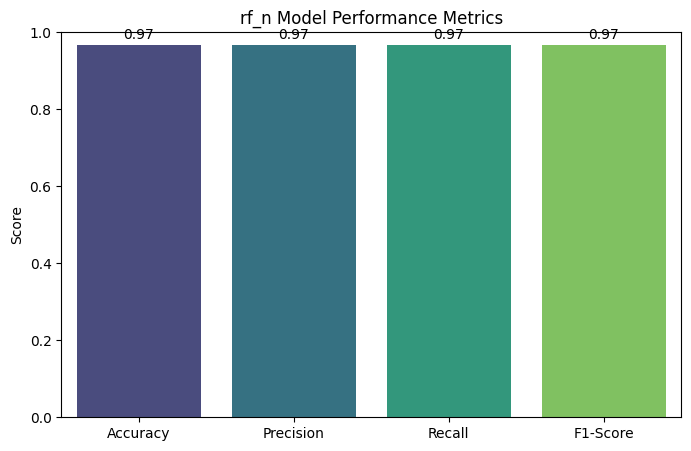

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendefinisikan daftar metrik yang akan divisualisasikan
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
# Menyimpan nilai-nilai metrik yang sudah dihitung dari evaluasi model
values = [rf_n_accuracy, rf_n_precision, rf_n_recall, rf_n_f1]

plt.figure(figsize=(8, 5))

# Membuat bar plot menggunakan seaborn dengan menambahkan parameter 'hue' agar setiap bar mendapatkan warna berbeda
# dan menghilangkan legenda (legend=False) untuk menghindari peringatan deprecation pada versi seaborn mendatang.
sns.barplot(x=metrics, y=values, hue=metrics, palette="viridis", legend=False)

# Menambahkan judul pada plot
plt.title('rf_n Model Performance Metrics')
# Menambahkan label untuk sumbu y
plt.ylabel('Score')
# Mengatur batas sumbu y agar nilai yang ditampilkan berkisar antara 0 hingga 1
plt.ylim(0, 1)

# Menambahkan teks yang menampilkan nilai metrik di atas masing-masing bar
for i in range(len(values)):
    plt.text(i, values[i] + 0.01, f'{values[i]:.2f}', ha='center', va='bottom')

# Menampilkan grafik
plt.show()

In [19]:
# Menggunakan model rf_n_model untuk memprediksi label pada data pelatihan (X_train)
y_pred_train = rf_n_model.predict(X_train)

# Menggunakan model rf_n_model untuk memprediksi label pada data pengujian (X_test)
y_pred_test = rf_n_model.predict(X_test)

# Mencetak laporan klasifikasi untuk data pelatihan,
# yang mencakup metrik seperti precision, recall, f1-score, dan support untuk setiap kelas
print(f'Classification Report (Train) : \n{classification_report(y_train, y_pred_train)}')

# Mencetak garis pemisah agar output terlihat lebih rapi
print('-----------------------------------------------------')

# Mencetak laporan klasifikasi untuk data pengujian,
# yang mencakup metrik seperti precision, recall, f1-score, dan support untuk setiap kelas
print(f'\nClassification Report (Test)  : \n{classification_report(y_test, y_pred_test)}')


Classification Report (Train) : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00       534

    accuracy                           1.00      1408
   macro avg       1.00      1.00      1.00      1408
weighted avg       1.00      1.00      1.00      1408

-----------------------------------------------------

Classification Report (Test)  : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       228
           1       0.97      0.94      0.95       125

    accuracy                           0.97       353
   macro avg       0.97      0.96      0.96       353
weighted avg       0.97      0.97      0.97       353



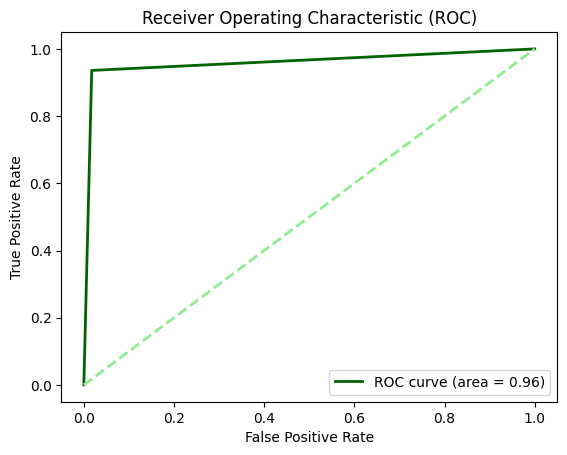

In [20]:
# Menghitung nilai False Positive Rate (fpr), True Positive Rate (tpr), dan thresholds menggunakan fungsi roc_curve
# y_test: label aktual pada data uji
# y_pred_test: label prediksi dari model untuk data uji
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

# Menghitung nilai Area Under the Curve (AUC) berdasarkan fpr dan tpr
roc_auc = auc(fpr, tpr)

# Membuat figure baru untuk plot ROC Curve
plt.figure()

# Plot ROC Curve dengan:
# - sumbu x: fpr (False Positive Rate)
# - sumbu y: tpr (True Positive Rate)
# - warna 'darkgreen', ketebalan garis 2, dan label yang menampilkan nilai AUC dengan format 2 desimal
plt.plot(fpr, tpr, color='darkgreen', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

# Plot garis diagonal sebagai acuan (garis random classifier) dengan warna 'lightgreen', ketebalan garis 2, dan garis putus-putus
plt.plot([0, 1], [0, 1], color='lightgreen', lw=2, linestyle='--')

# Menambahkan label sumbu x dan sumbu y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Menambahkan judul pada plot
plt.title('Receiver Operating Characteristic (ROC)')

# Menampilkan legenda di posisi bawah kanan
plt.legend(loc='lower right')

# Menonaktifkan grid pada plot
plt.grid(False)

# Menampilkan plot ROC Curve
plt.show()

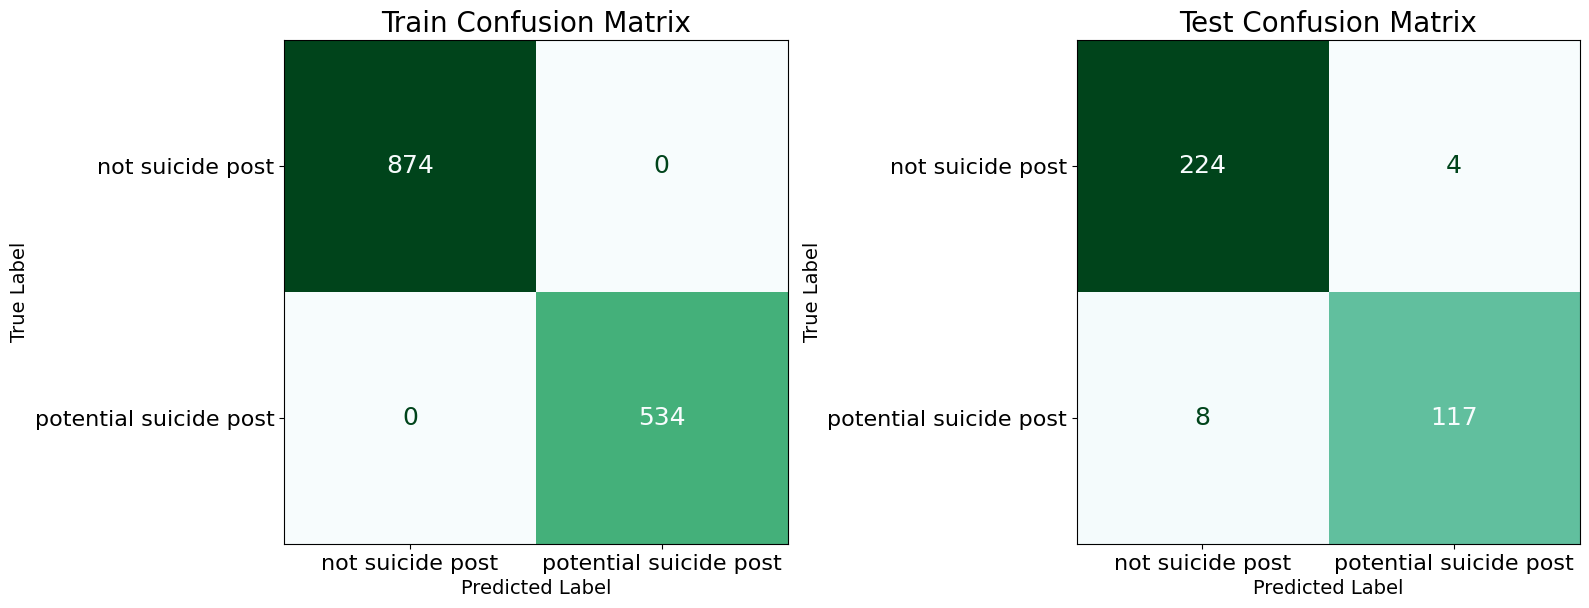

In [21]:
# Mengimpor modul pyplot dari matplotlib untuk pembuatan grafik
import matplotlib.pyplot as plt
# Mengimpor fungsi confusion_matrix dan ConfusionMatrixDisplay dari sklearn.metrics untuk evaluasi model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat confusion matrix untuk data pelatihan dengan membandingkan label aktual (y_train) dengan prediksi model (y_pred_train)
train_matrix = confusion_matrix(y_train, y_pred_train)
# Membuat confusion matrix untuk data pengujian dengan membandingkan label aktual (y_test) dengan prediksi model (y_pred_test)
test_matrix = confusion_matrix(y_test, y_pred_test)

# Mendefinisikan label kelas untuk confusion matrix
class_labels = ['not suicide post', 'potential suicide post']

# Membuat objek ConfusionMatrixDisplay untuk data pelatihan menggunakan confusion matrix yang telah dibuat dan label kelas
disp_train = ConfusionMatrixDisplay(confusion_matrix=train_matrix, display_labels=class_labels)
# Membuat objek ConfusionMatrixDisplay untuk data pengujian menggunakan confusion matrix yang telah dibuat dan label kelas
disp_test = ConfusionMatrixDisplay(confusion_matrix=test_matrix, display_labels=class_labels)

# Membuat figure dengan 1 baris dan 2 kolom subplots, ukuran keseluruhan figure adalah 16x8 inci
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # Ukuran figure dapat disesuaikan melalui parameter figsize

# --- Plot Confusion Matrix untuk Data Pelatihan ---
# Plot confusion matrix pada subplot pertama (axs[0]) dengan colormap 'BuGn' dan tanpa colorbar
disp_train.plot(ax=axs[0], cmap='BuGn', colorbar=False)
# Mengatur judul subplot pertama dengan ukuran font 20
axs[0].set_title('Train Confusion Matrix', fontsize=20)
# Mengatur label sumbu x pada subplot pertama dengan ukuran font 14
axs[0].set_xlabel('Predicted Label', fontsize=14)
# Mengatur label sumbu y pada subplot pertama dengan ukuran font 14
axs[0].set_ylabel('True Label', fontsize=14)
# Mengatur ukuran font pada tick labels sumbu x dan y pada subplot pertama menjadi 16
for label in axs[0].get_xticklabels() + axs[0].get_yticklabels():
    label.set_fontsize(16)

# --- Plot Confusion Matrix untuk Data Pengujian ---
# Plot confusion matrix pada subplot kedua (axs[1]) dengan colormap 'BuGn' dan tanpa colorbar
disp_test.plot(ax=axs[1], cmap='BuGn', colorbar=False)
# Mengatur judul subplot kedua dengan ukuran font 20
axs[1].set_title('Test Confusion Matrix', fontsize=20)
# Mengatur label sumbu x pada subplot kedua dengan ukuran font 14
axs[1].set_xlabel('Predicted Label', fontsize=14)
# Mengatur label sumbu y pada subplot kedua dengan ukuran font 14
axs[1].set_ylabel('True Label', fontsize=14)
# Mengatur ukuran font pada tick labels sumbu x dan y pada subplot kedua menjadi 16
for label in axs[1].get_xticklabels() + axs[1].get_yticklabels():
    label.set_fontsize(16)

# --- Penyesuaian Ukuran Font pada Angka di Dalam Confusion Matrix ---
# Untuk setiap subplot, atur ukuran font teks yang terdapat di dalam confusion matrix menjadi 18
for ax in axs:
    for text in ax.texts:
        text.set_fontsize(18)

# Menyesuaikan tata letak subplot agar tidak terjadi tumpang tindih antar elemen
plt.tight_layout()
# Menampilkan figure yang telah dibuat
plt.show()